In [800]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [802]:
df = pd.read_csv('train.csv')
df.head()
test = pd.read_csv('test.csv')

In [804]:
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [806]:
df.shape

(19237, 18)

In [808]:
df.index=df['ID']
df.drop(columns='ID',inplace=True)
df.shape

(19237, 17)

In [810]:
df.drop_duplicates(inplace=True)
df.shape

(15725, 17)

In [812]:
df.describe(include='all')

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
count,1.572500e+04,15725,15725,15725,15725.000000,15725,15725,15725,15725,15725,15725.000000,15725,15725,15725,15725,15725,15725.000000
unique,NaN,559,65,1590,NaN,11,2,7,107,7687,NaN,4,3,3,2,16,NaN
top,NaN,-,HYUNDAI,Prius,NaN,Sedan,Yes,Petrol,2,0 km,NaN,Automatic,Front,04-May,Left wheel,Black,NaN
freq,NaN,5684,3050,946,NaN,7010,10558,8824,3314,608,NaN,10088,10990,14855,14293,3835,NaN
mean,2.027944e+04,NaN,NaN,NaN,2010.518919,NaN,NaN,NaN,NaN,NaN,4.483561,NaN,NaN,NaN,NaN,NaN,6.543339
std,2.106390e+05,NaN,NaN,NaN,6.012122,NaN,NaN,NaN,NaN,NaN,1.134466,NaN,NaN,NaN,NaN,NaN,4.067728
min,1.000000e+00,NaN,NaN,NaN,1939.000000,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000
25%,7.527000e+03,NaN,NaN,NaN,2008.000000,NaN,NaN,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,4.000000
50%,1.416600e+04,NaN,NaN,NaN,2012.000000,NaN,NaN,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,6.000000
75%,2.336400e+04,NaN,NaN,NaN,2014.000000,NaN,NaN,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,12.000000


In [814]:
df.isna().sum()

Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

In [816]:
df.dtypes

Price                 int64
Levy                 object
Manufacturer         object
Model                object
Prod. year            int64
Category             object
Leather interior     object
Fuel type            object
Engine volume        object
Mileage              object
Cylinders           float64
Gear box type        object
Drive wheels         object
Doors                object
Wheel                object
Color                object
Airbags               int64
dtype: object

In [818]:
df['Levy'] = df['Levy'].replace('-',np.nan)
df['Levy'] = df['Levy'].astype('float16')

## **Engine Volume and Turbo**

In [820]:
def Engvol(df):                                                          # Cleaning EngVol and creating a new Variable "Turbo"
    Turbo=[]
    for i, index in enumerate(df['Engine volume'].index):
        if len(df['Engine volume'][index])>4:
            Turbo.append(1)
            df['Engine volume'][index] = df['Engine volume'][index][:3]
        else:
            Turbo.append(0)
            df['Engine volume'][index] = df['Engine volume'][index][:3]
    df['Turbo']= Turbo
    df['Engine volume'] = df['Engine volume'].astype('float16')

In [822]:
Engvol(df)
df.tail()

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Turbo
ID,,,,,,,,,,,,,,,,,,
45760891,470,645.0,TOYOTA,Prius,2011,Hatchback,Yes,Hybrid,1.799805,307325 km,4.0,Automatic,Front,04-May,Left wheel,Silver,12,0
45798355,8467,NaN,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.000000,300000 km,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5,1
45778856,15681,831.0,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.400391,161600 km,4.0,Tiptronic,Front,04-May,Left wheel,Red,8,0
45804997,26108,836.0,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2.000000,116365 km,4.0,Automatic,Front,04-May,Left wheel,Grey,4,0
45813273,470,753.0,HYUNDAI,Sonata,2012,Sedan,Yes,Hybrid,2.400391,186923 km,4.0,Automatic,Front,04-May,Left wheel,White,12,0


## **Mileage**

In [824]:
df['Mileage'] = [i[0:-3] for i in df['Mileage']]
df['Mileage'] = df['Mileage'].astype('int64')
df.tail()

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Turbo
ID,,,,,,,,,,,,,,,,,,
45760891,470,645.0,TOYOTA,Prius,2011,Hatchback,Yes,Hybrid,1.799805,307325,4.0,Automatic,Front,04-May,Left wheel,Silver,12,0
45798355,8467,NaN,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.000000,300000,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5,1
45778856,15681,831.0,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.400391,161600,4.0,Tiptronic,Front,04-May,Left wheel,Red,8,0
45804997,26108,836.0,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2.000000,116365,4.0,Automatic,Front,04-May,Left wheel,Grey,4,0
45813273,470,753.0,HYUNDAI,Sonata,2012,Sedan,Yes,Hybrid,2.400391,186923,4.0,Automatic,Front,04-May,Left wheel,White,12,0


<Axes: xlabel='Mileage', ylabel='Count'>

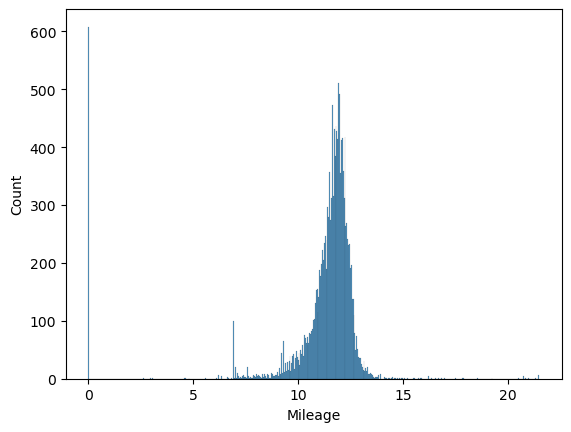

In [826]:
sns.histplot(np.log1p(df['Mileage']),bins=500)

In [573]:
df['Mileage'].describe()

count    1.572500e+04
mean     1.836421e+06
std      5.353248e+07
min      0.000000e+00
25%      6.657500e+04
50%      1.210000e+05
75%      1.800000e+05
max      2.147484e+09
Name: Mileage, dtype: float64

## **Levy**

In [828]:
df['Levy'] = df['Levy'].astype('float32')


<Axes: xlabel='Levy', ylabel='Count'>

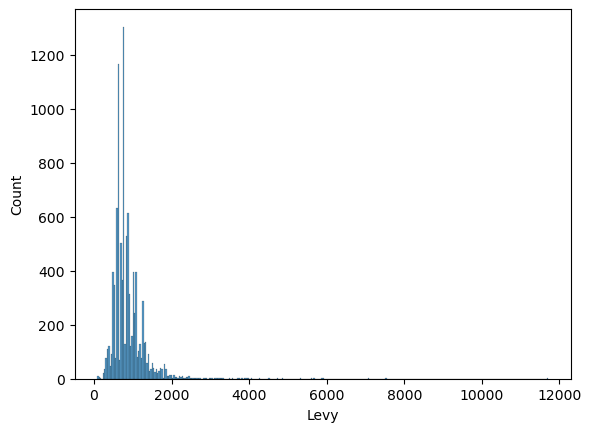

In [830]:
sns.histplot(df['Levy'])

In [832]:
#replacing NaN values in Levy by the median of the column since the distribution is skewed
df['Levy'] = df['Levy'].replace(np.nan,df['Levy'].median())
levy_median = df['Levy'].median()
df.head()

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Turbo
ID,,,,,,,,,,,,,,,,,,
45654403,13328,1399.0,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.500000,186005,6.0,Automatic,4x4,04-May,Left wheel,Silver,12,0
44731507,16621,1018.0,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3.000000,192000,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8,0
45774419,8467,779.0,HONDA,FIT,2006,Hatchback,No,Petrol,1.299805,200000,4.0,Variator,Front,04-May,Right-hand drive,Black,2,0
45769185,3607,862.0,FORD,Escape,2011,Jeep,Yes,Hybrid,2.500000,168966,4.0,Automatic,4x4,04-May,Left wheel,White,0,0
45809263,11726,446.0,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.299805,91901,4.0,Automatic,Front,04-May,Left wheel,Silver,4,0


## **Price**

In [579]:
df['Price'].value_counts().sort_index(ascending=False).head(10)

Price
26307500    1
872946      1
627220      1
308906      1
297930      2
288521      1
260296      1
254024      1
250574      1
228935      1
Name: count, dtype: int64

In [580]:
df = df[df['Price']<500000]

<Axes: xlabel='Price', ylabel='Count'>

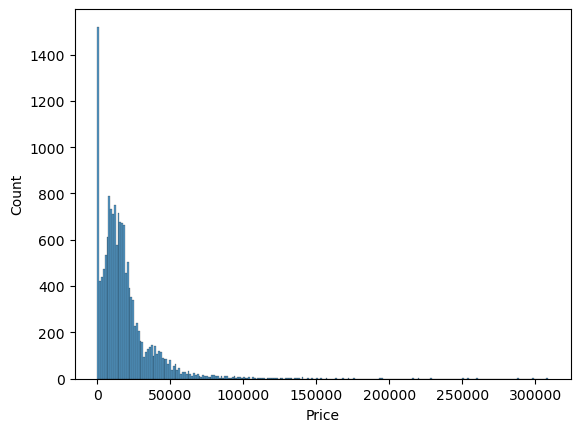

In [581]:
sns.histplot(df['Price'])

In [582]:
df = df[df['Price']<70000]

<Axes: xlabel='Price', ylabel='Count'>

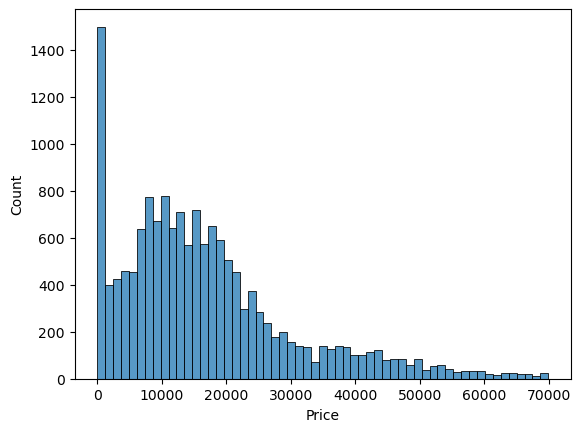

In [583]:
sns.histplot(df['Price'])

In [584]:
df.shape

(15421, 18)

<Axes: xlabel='count', ylabel='Manufacturer'>

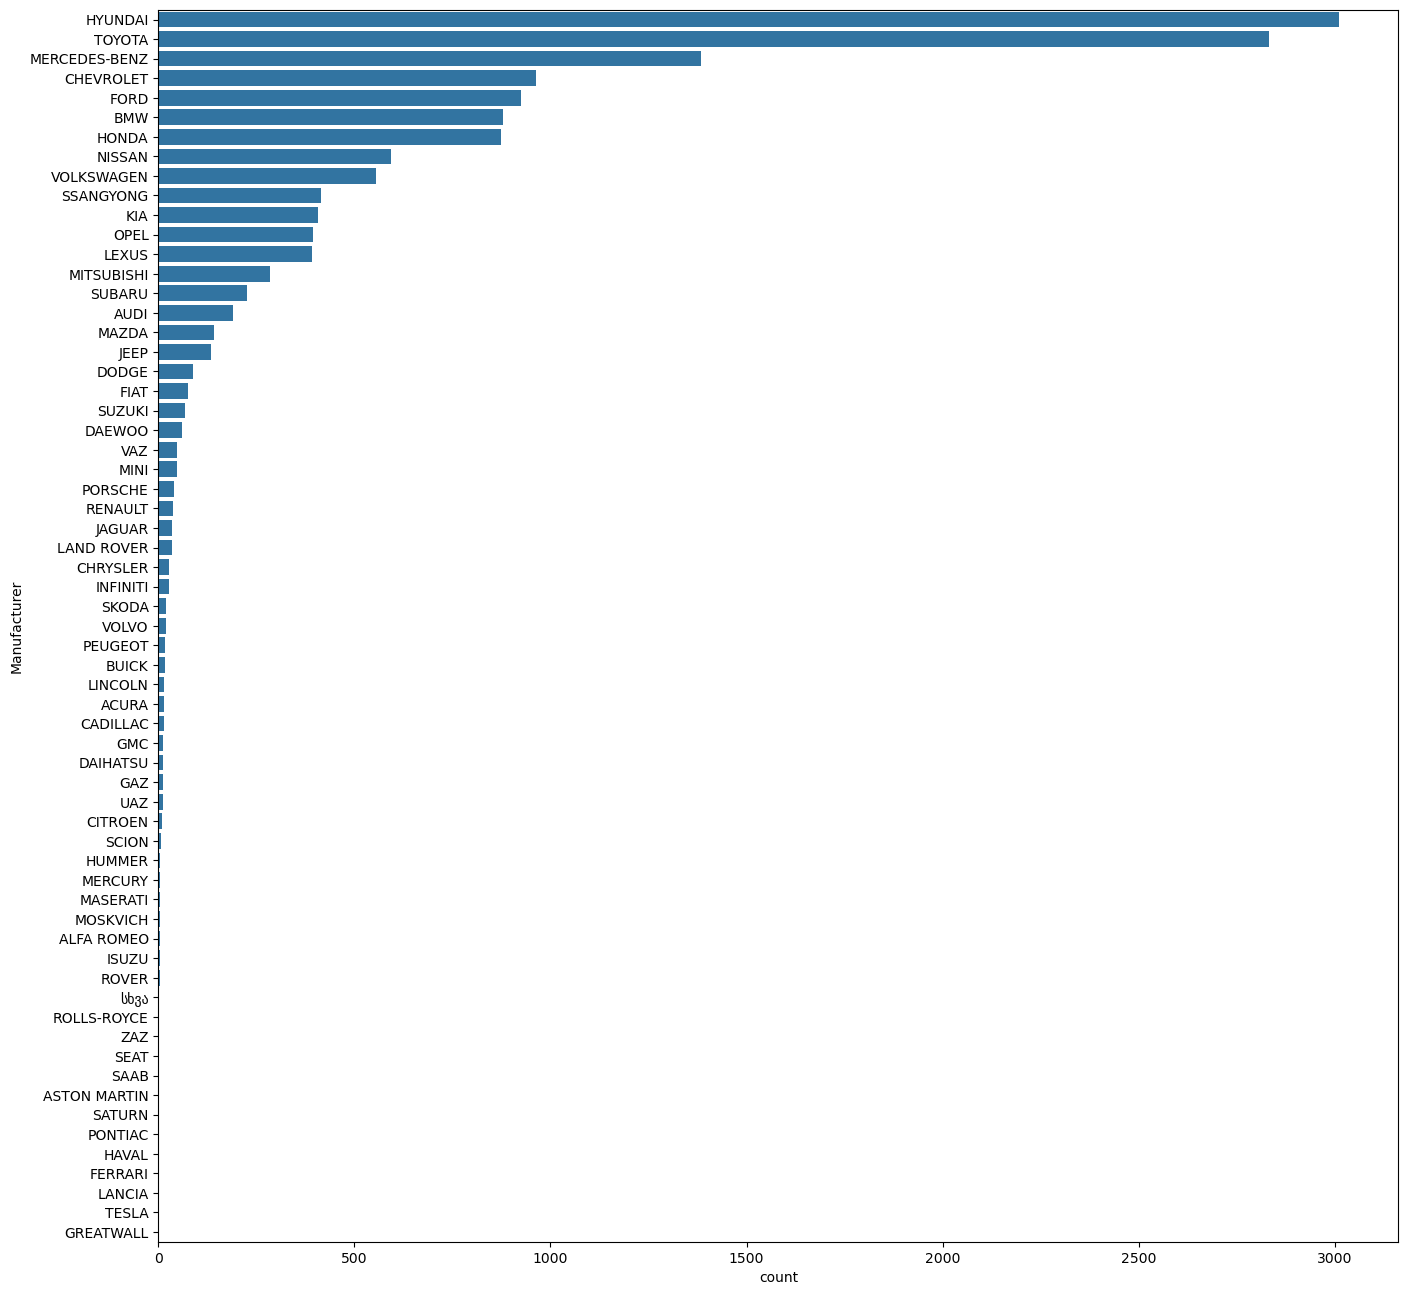

In [585]:
plt.figure(figsize=(16,16))
sns.countplot(y = df['Manufacturer'],order=df['Manufacturer'].value_counts().sort_values(ascending=False).index)

<Axes: xlabel='count', ylabel='Prod. year'>

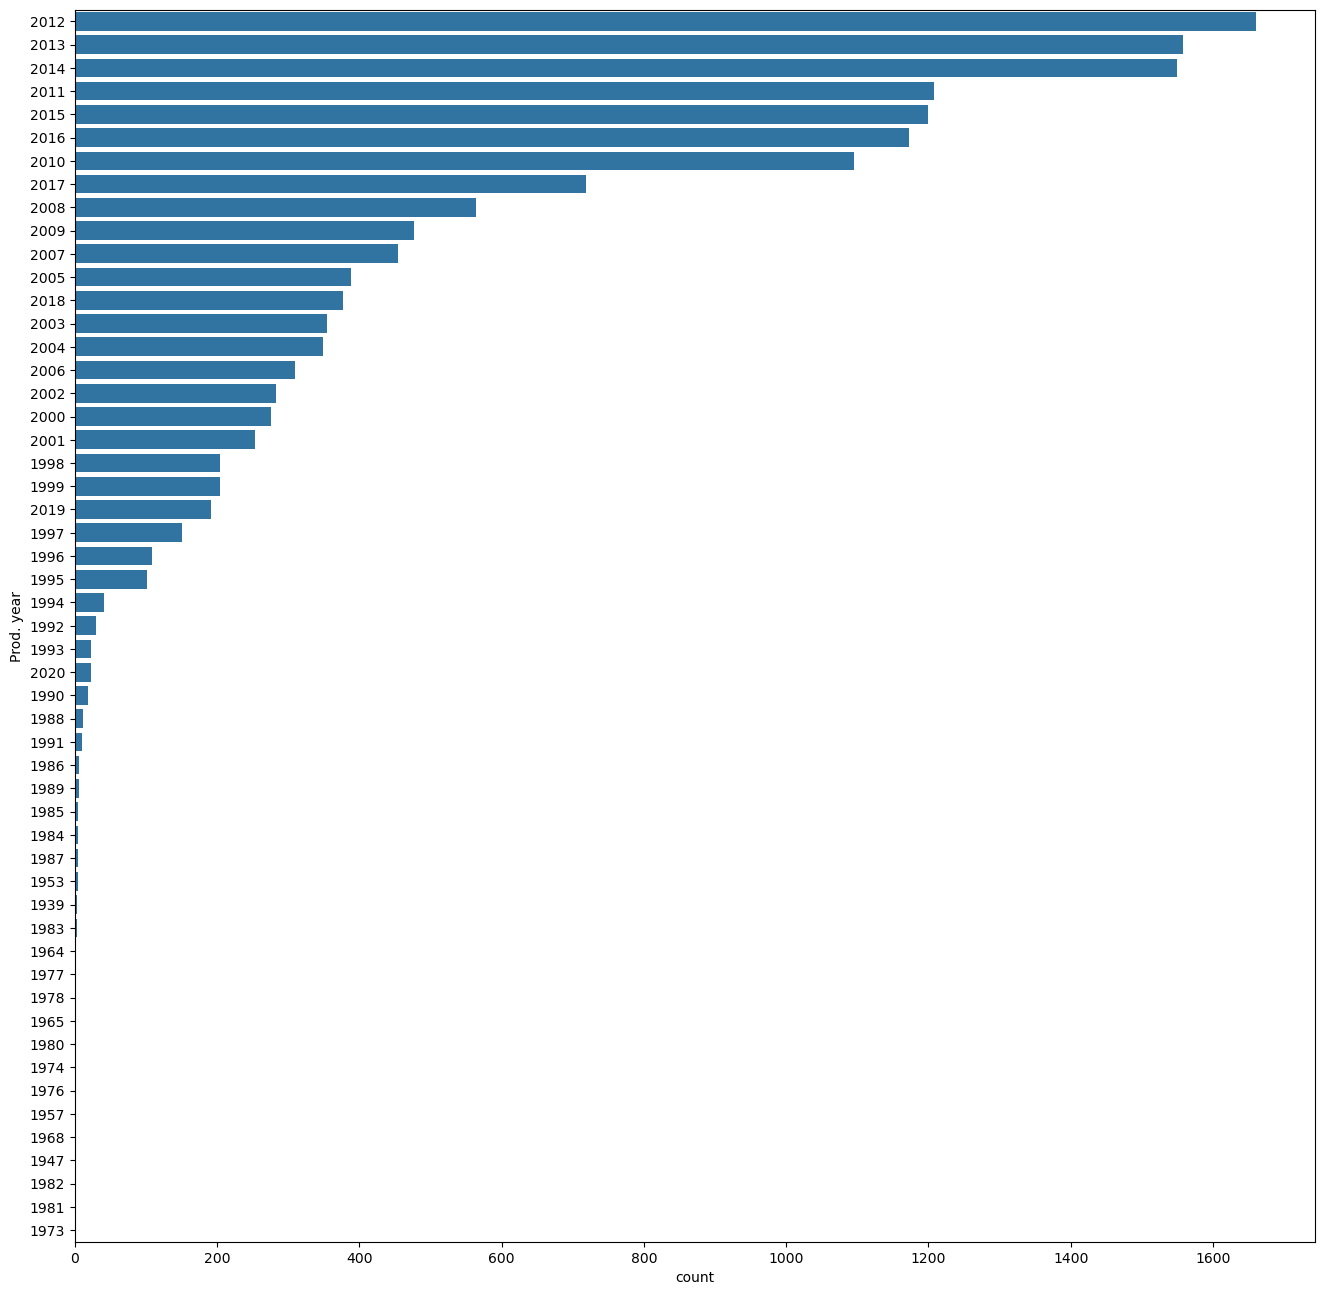

In [586]:
plt.figure(figsize=(16,16))
sns.countplot(y = df['Prod. year'],order=df['Prod. year'].value_counts().sort_values(ascending=False).index)

<Axes: xlabel='count', ylabel='Category'>

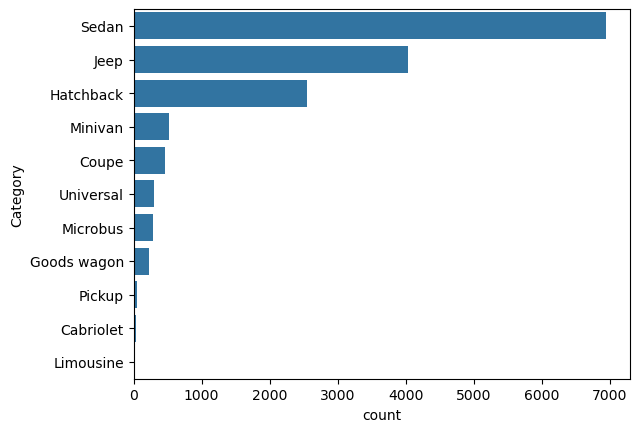

In [587]:
#plt.figure(figsize=(16,16))
sns.countplot(y = df['Category'],order=df['Category'].value_counts().sort_values(ascending=False).index)

<Axes: xlabel='Doors', ylabel='count'>

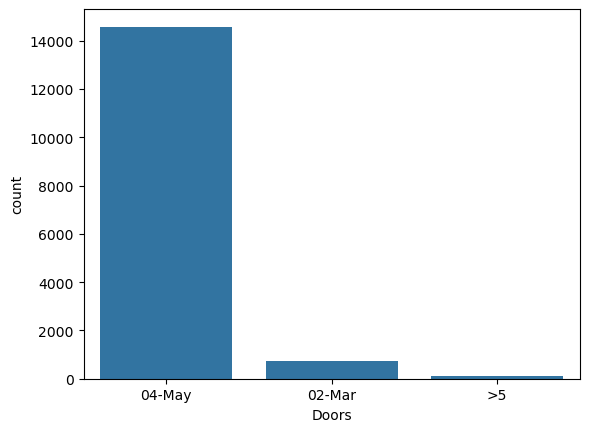

In [588]:
sns.countplot(x='Doors', data=df)

<Axes: xlabel='Wheel', ylabel='count'>

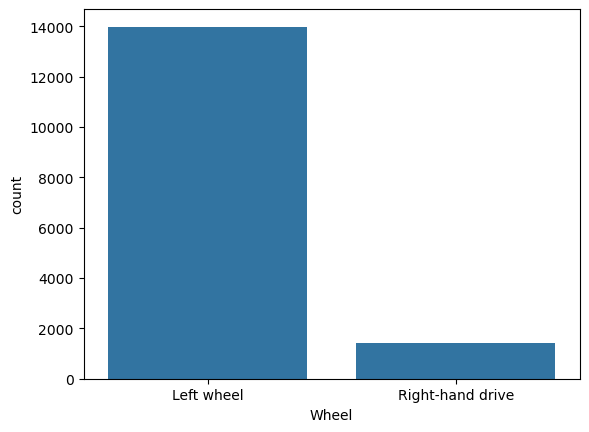

In [589]:
sns.countplot(x='Wheel',data=df)

<Axes: xlabel='Airbags', ylabel='count'>

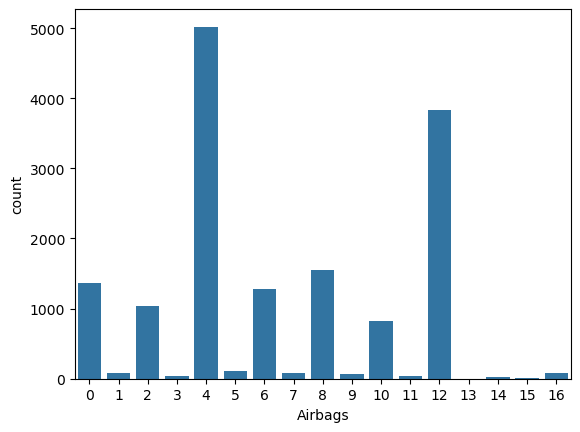

In [590]:
sns.countplot(x='Airbags',data=df)

<Axes: xlabel='Fuel type', ylabel='count'>

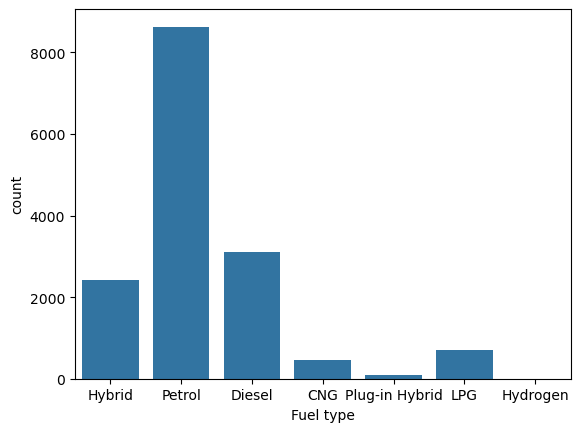

In [591]:
sns.countplot(x='Fuel type',data=df)

In [592]:
for i in df.select_dtypes('object').columns:
    print(i,df[i].nunique())

Manufacturer 63
Model 1529
Category 11
Leather interior 2
Fuel type 7
Gear box type 4
Drive wheels 3
Doors 3
Wheel 2
Color 16


## **Multivariate**

In [594]:
df.head()

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Turbo
ID,,,,,,,,,,,,,,,,,,
45654403,13328,1399.0,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.500000,186005,6.0,Automatic,4x4,04-May,Left wheel,Silver,12,0
44731507,16621,1018.0,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3.000000,192000,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8,0
45774419,8467,779.0,HONDA,FIT,2006,Hatchback,No,Petrol,1.299805,200000,4.0,Variator,Front,04-May,Right-hand drive,Black,2,0
45769185,3607,862.0,FORD,Escape,2011,Jeep,Yes,Hybrid,2.500000,168966,4.0,Automatic,4x4,04-May,Left wheel,White,0,0
45809263,11726,446.0,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.299805,91901,4.0,Automatic,Front,04-May,Left wheel,Silver,4,0


## **Manufacturer**

<Axes: xlabel='Price', ylabel='Manufacturer'>

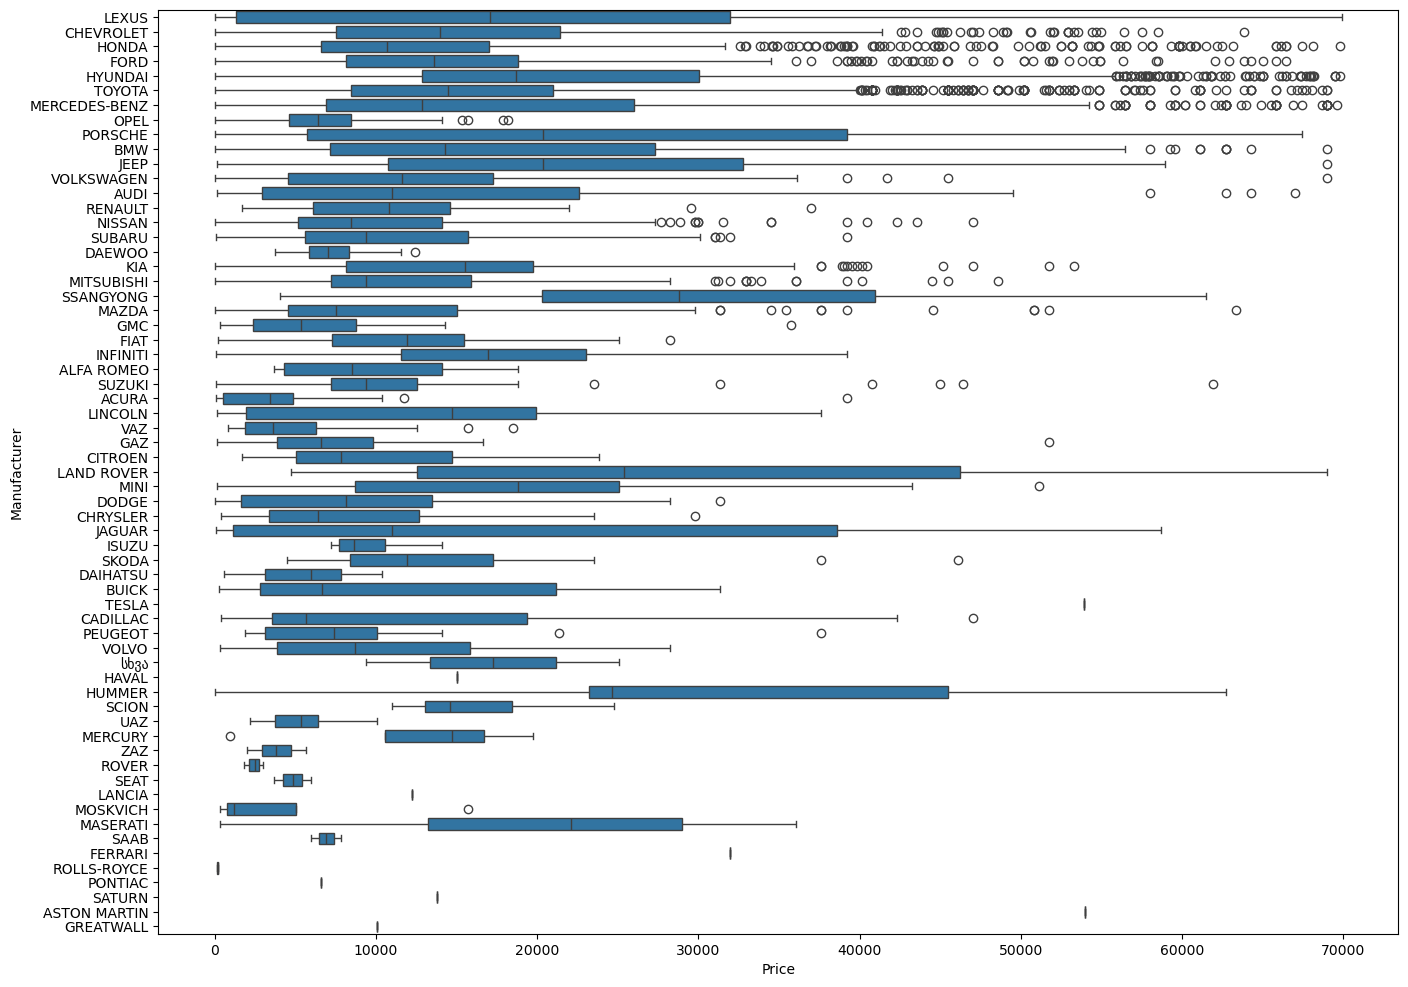

In [596]:
plt.figure(figsize=(16,12))
sns.boxplot(y ='Manufacturer',x='Price',data=df)

## **Production Year**

In [598]:
df = df[df['Prod. year']>1984]

<Axes: xlabel='Prod. year', ylabel='Price'>

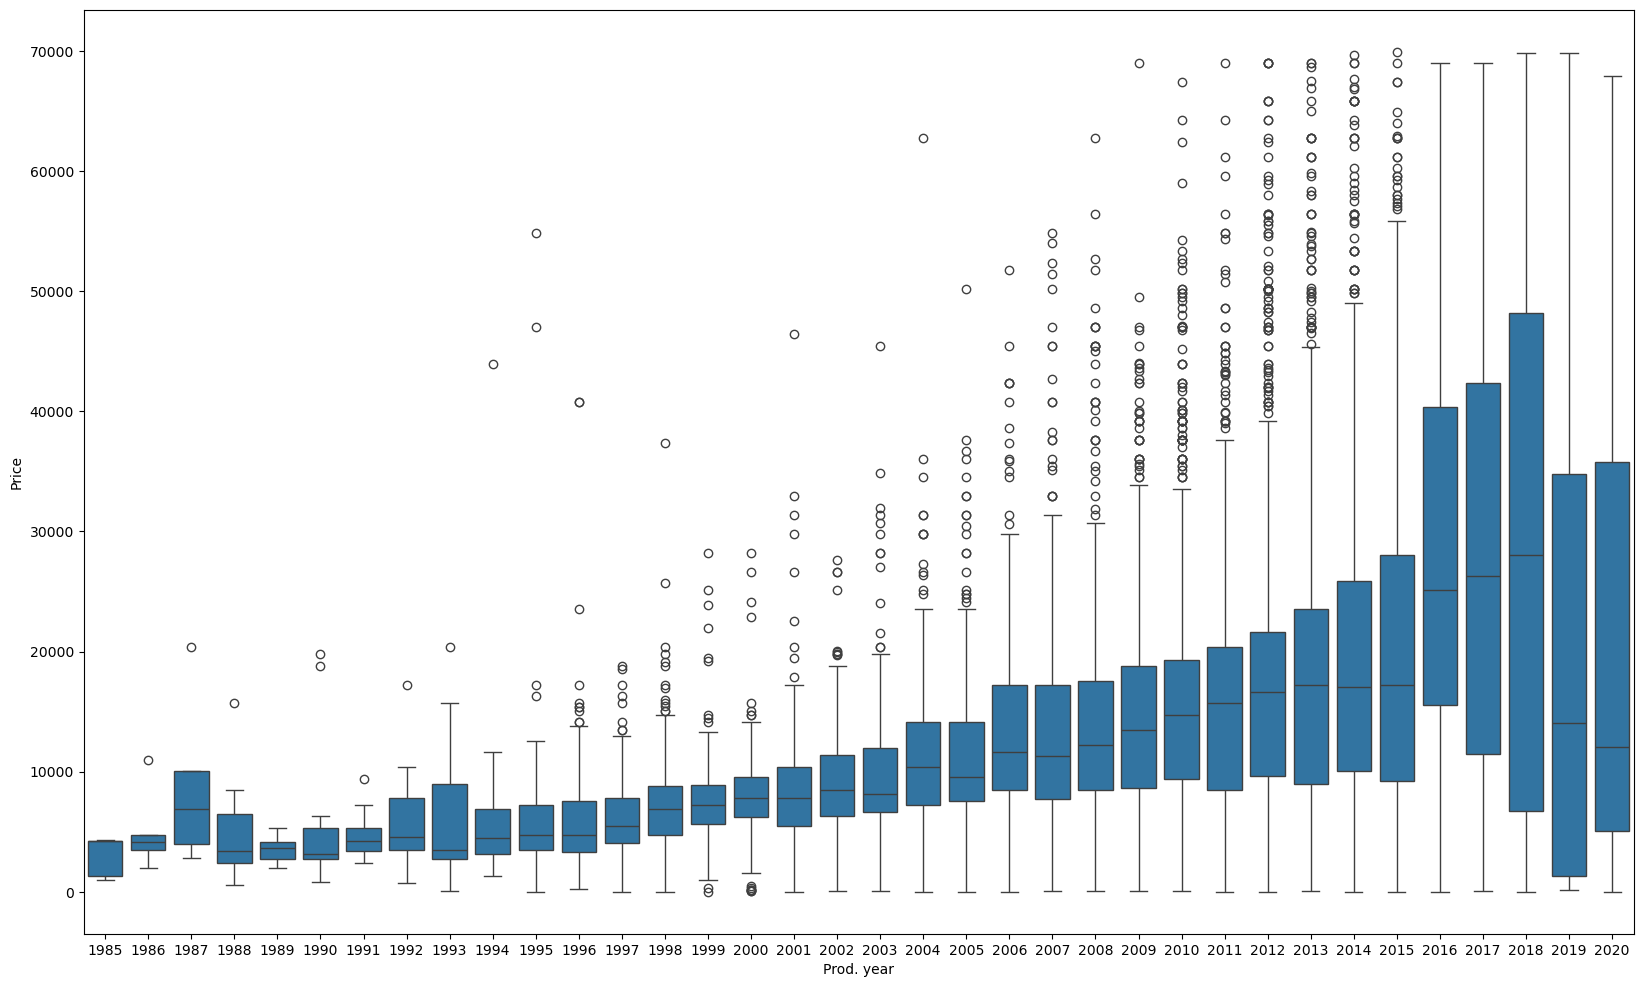

In [599]:
plt.figure(figsize=(20,12))
sns.boxplot(x = df['Prod. year'],y=df['Price'])

In [600]:
df.drop(index=df[(df['Prod. year']<1993)& (df['Price']>10500)].index,inplace=True)
df.drop(index=df[(df['Prod. year']<1998)& (df['Price']>20000)].index,inplace=True)
df.drop(index=df[(df['Prod. year']<2006)& (df['Price']>39000)].index,inplace=True)
df.drop(index=df[(df['Prod. year']<2010)& (df['Price']>50000)].index,inplace=True)
df.drop(index=df[(df['Prod. year']<2013)& (df['Price']>75000)].index,inplace=True)
df.drop(index=df[(df['Prod. year']<2015)& (df['Price']>120000)].index,inplace=True)
df.drop(index=df[df['Price']>150000].index,inplace=True)

<Axes: xlabel='Prod. year', ylabel='Price'>

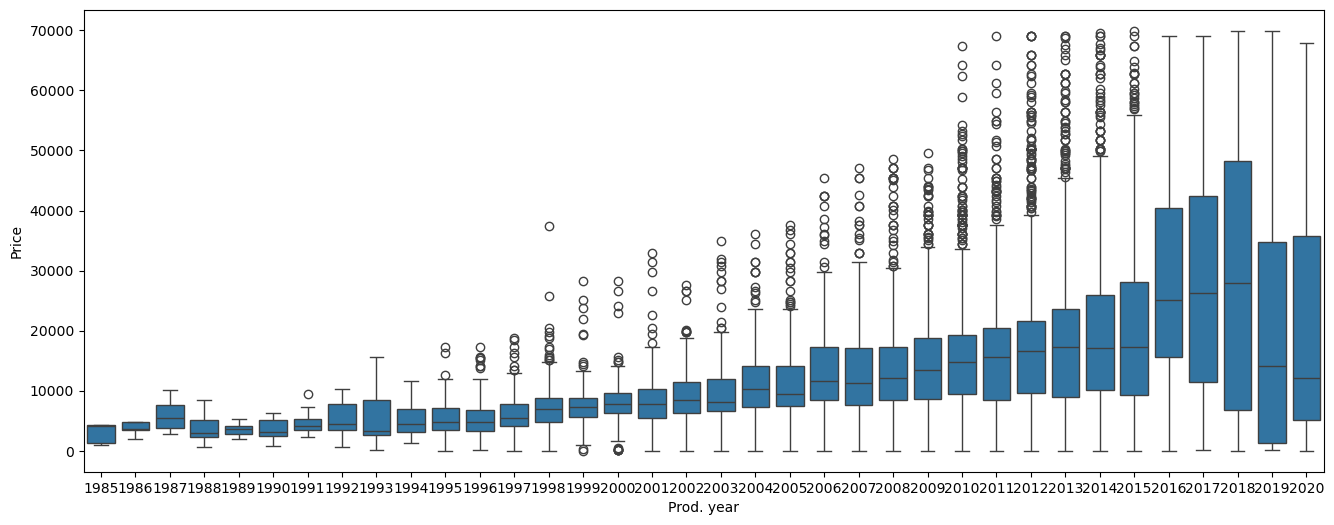

In [601]:
plt.figure(figsize=(16,6))
sns.boxplot(x = df['Prod. year'],y=df['Price'])

## **Category**

<Axes: xlabel='Category', ylabel='Price'>

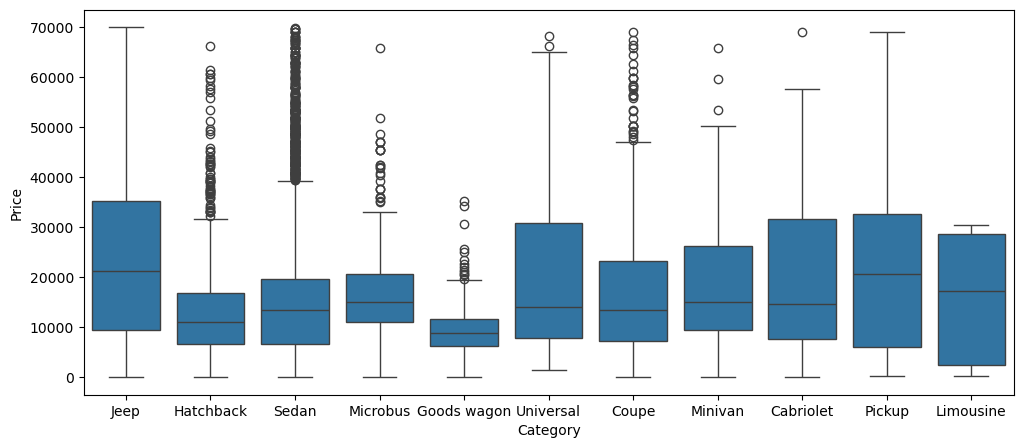

In [603]:
plt.figure(figsize=(12,5))
sns.boxplot(x = df['Category'],y=df['Price'])

In [604]:
df.drop(index=df[(df['Category']=='Hatchback')&(df['Price']>62000)].index,inplace=True)
df.drop(index=df[(df['Category']=='Jeep')&(df['Price']>142000)].index,inplace=True)
df.drop(index=df[(df['Category']=='Sedan')&(df['Price']>120000)].index,inplace=True)
df.drop(index=df[(df['Category']=='Microbus')&(df['Price']>60000)].index,inplace=True)
df.drop(index=df[(df['Category']=='Universal')&(df['Price']>72000)].index,inplace=True)
df.drop(index=df[(df['Category']=='Coupe')&(df['Price']>90000)].index,inplace=True)
df.drop(index=df[(df['Category']=='Pickup')&(df['Price']>70000)].index,inplace=True)
df.drop(index=df[(df['Category']=='Cabriolet')&(df['Price']>65000)].index,inplace=True)

<Axes: xlabel='Category', ylabel='Price'>

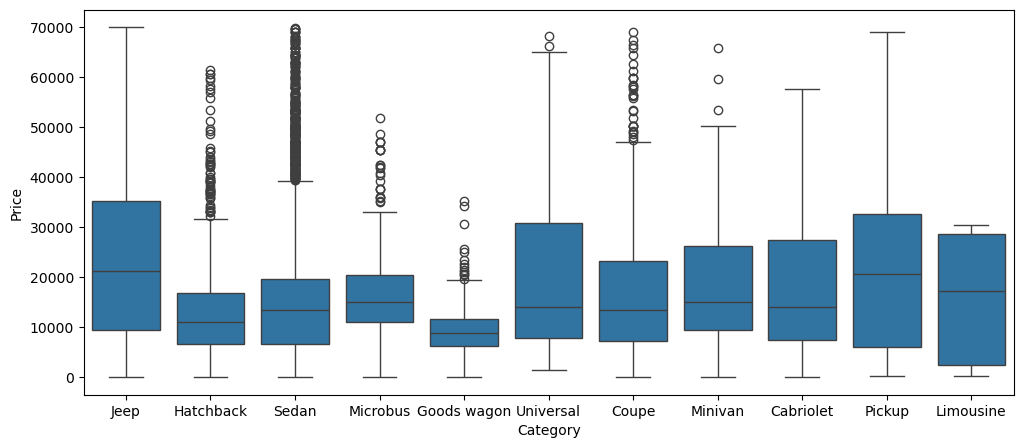

In [605]:
plt.figure(figsize=(12,5))
sns.boxplot(x = df['Category'],y=df['Price'])

<Axes: xlabel='Leather interior', ylabel='Price'>

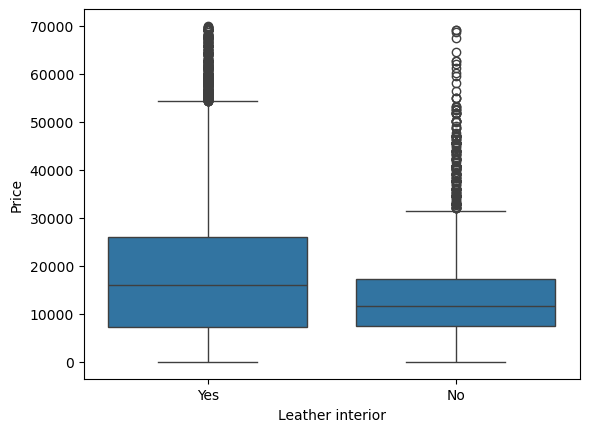

In [606]:
sns.boxplot(x=df['Leather interior'],y=df['Price'])

<Axes: xlabel='Fuel type', ylabel='Price'>

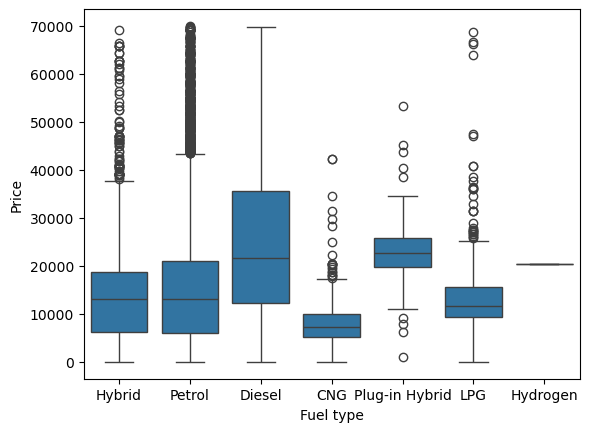

In [607]:
sns.boxplot(x=df['Fuel type'],y=df['Price'])

In [608]:
df.drop(index=df[(df['Fuel type']=='Hybrid')& (df['Price']>80000)].index,inplace=True)
df.drop(index=df[(df['Fuel type']=='Plug-in Hybrid')& (df['Price']>60000)].index,inplace=True)
df.drop(index=df[(df['Fuel type']=='Hydrogen')].index,inplace=True)

<Axes: xlabel='Gear box type', ylabel='Price'>

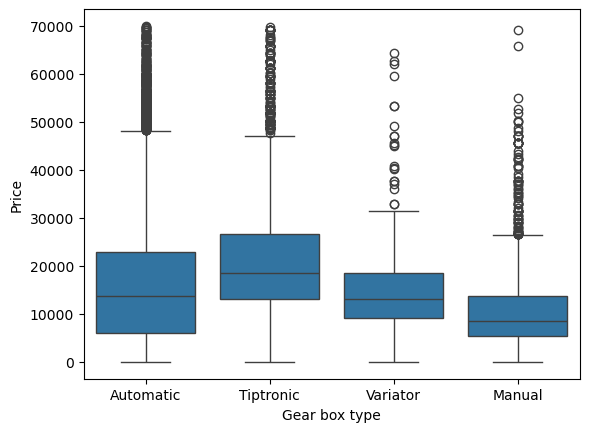

In [609]:
sns.boxplot(x=df['Gear box type'],y=df['Price'])

In [610]:
df.drop(index=df[(df['Gear box type']=='Variator')& (df['Price']>70000)].index,inplace=True)
df.drop(index=df[(df['Gear box type']=='Manual')& (df['Price']>80000)].index,inplace=True)

<Axes: xlabel='Drive wheels', ylabel='Price'>

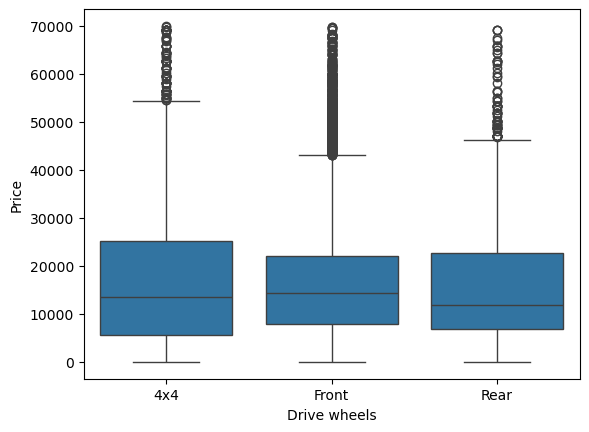

In [611]:
sns.boxplot(x=df['Drive wheels'],y=df['Price'])

<Axes: xlabel='Doors', ylabel='Price'>

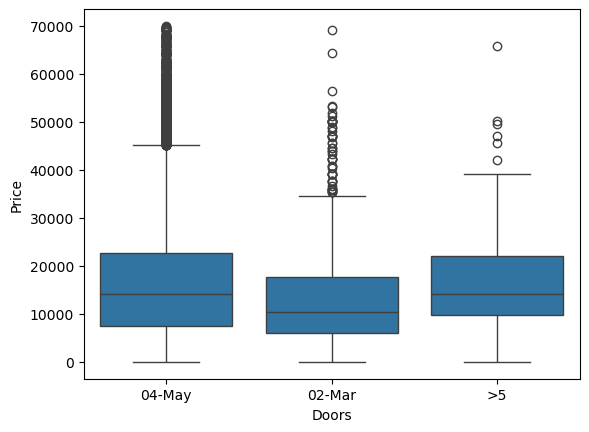

In [612]:
sns.boxplot(x=df['Doors'],y=df['Price'])

In [613]:
df.drop(index=df[(df['Doors']=='>5')& (df['Price']>85000)].index,inplace=True)

<Axes: xlabel='Wheel', ylabel='Price'>

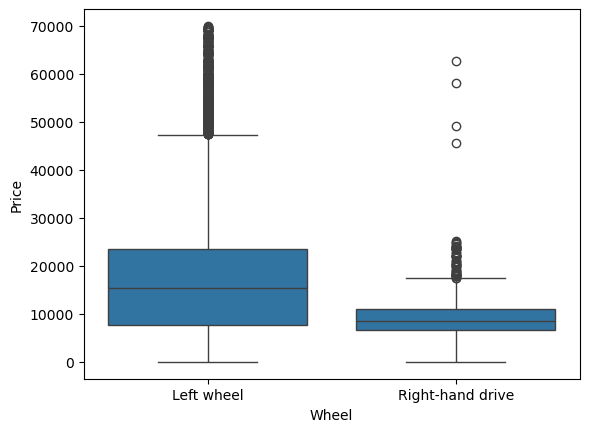

In [614]:
sns.boxplot(x=df['Wheel'],y=df['Price'])

In [615]:
df.drop(index=df[(df['Wheel']=='Right-hand drive')& (df['Price']>40000)].index,inplace=True)

<Axes: xlabel='Color', ylabel='Price'>

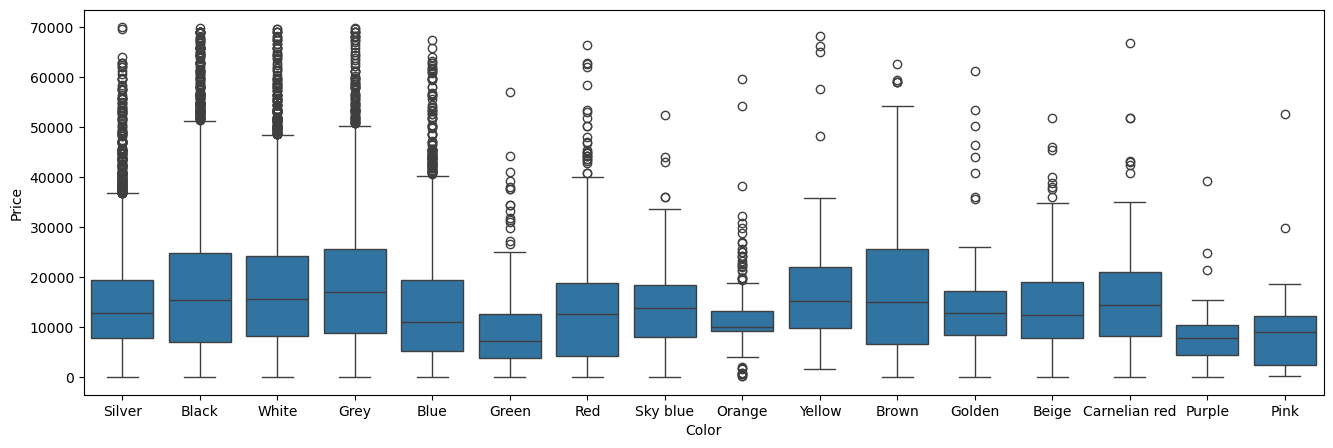

In [616]:
plt.figure(figsize=(16,5))
sns.boxplot(x=df['Color'],y=df['Price'])

## **Airbags**

<Axes: xlabel='Airbags', ylabel='Price'>

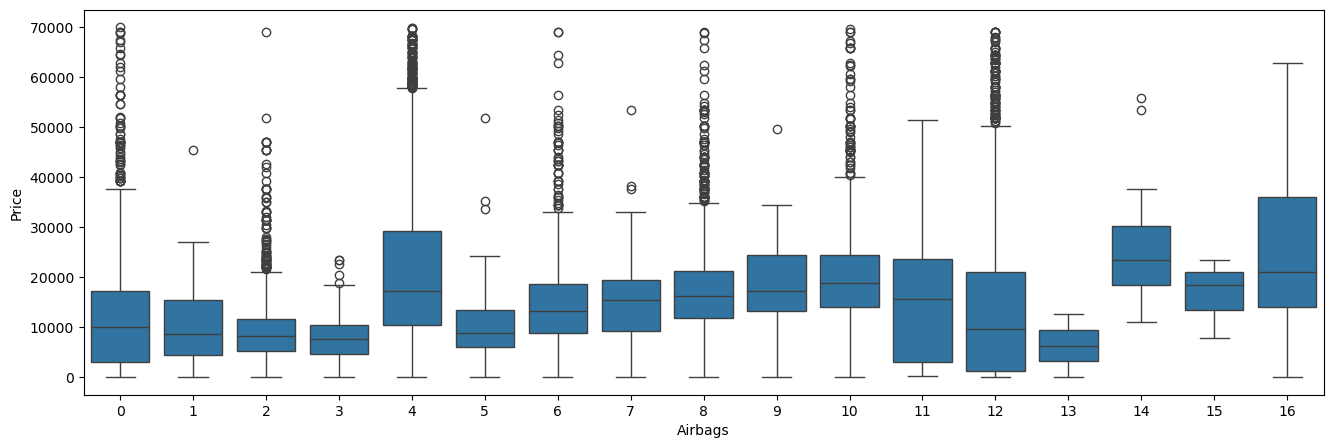

In [618]:
plt.figure(figsize=(16,5))
sns.boxplot(x=df['Airbags'],y=df['Price'])

In [619]:
#df.drop(index=df[(df['Wheel']=='Right-hand drive')& (df['Price']>40000)].index,inplace=True)
df.drop(index=df[((df['Airbags']==0)|(df['Airbags']==2)|(df['Airbags']==6)|(df['Airbags']==8)|(df['Airbags']==10)) & (df['Price']>60000)].index,inplace=True)
df.drop(index=df[(df['Airbags']==1)& (df['Price']>40000)].index,inplace=True)
df.drop(index=df[(df['Airbags']==5)& (df['Price']>30000)].index,inplace=True)
df.drop(index=df[(df['Airbags']==7)& (df['Price']>35000)].index,inplace=True)
df.drop(index=df[(df['Airbags']==9)& (df['Price']>40000)].index,inplace=True)
df.drop(index=df[(df['Airbags']==14)& (df['Price']>40000)].index,inplace=True)

<Axes: xlabel='Airbags', ylabel='Price'>

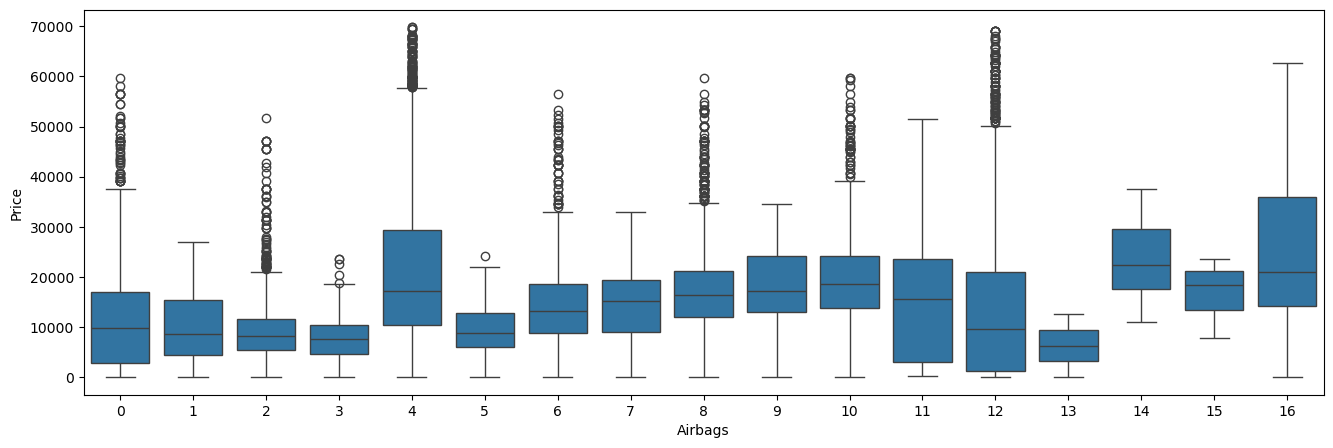

In [620]:
plt.figure(figsize=(16,5))
sns.boxplot(x=df['Airbags'],y=df['Price'])

### **Engine volume**

<Axes: xlabel='Engine volume', ylabel='Price'>

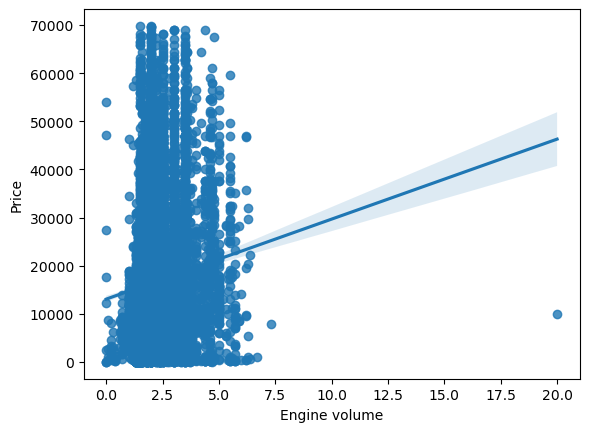

In [622]:
sns.regplot(x=df['Engine volume'], y=df['Price'])

In [623]:
df = df[df['Engine volume']<7]

<Axes: xlabel='Engine volume', ylabel='Price'>

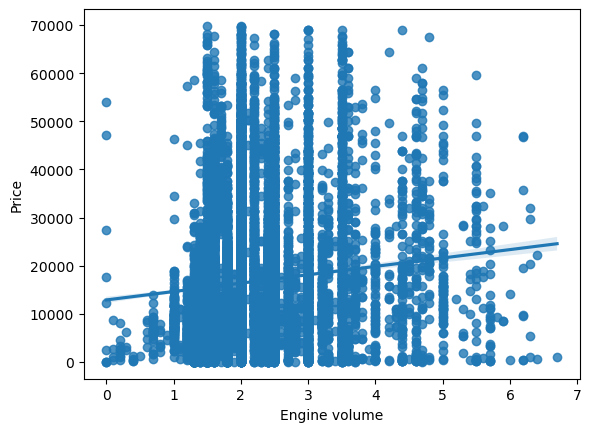

In [624]:
sns.regplot(x=df['Engine volume'],y=df['Price'])

## **Adding New Feature**

In [626]:
new= []
for mil in df['Mileage']:
    if mil==0:
        new.append(1)
    else:
        new.append(0)
df['New_Car'] = new

### **Mileage**

<Axes: xlabel='Mileage', ylabel='Price'>

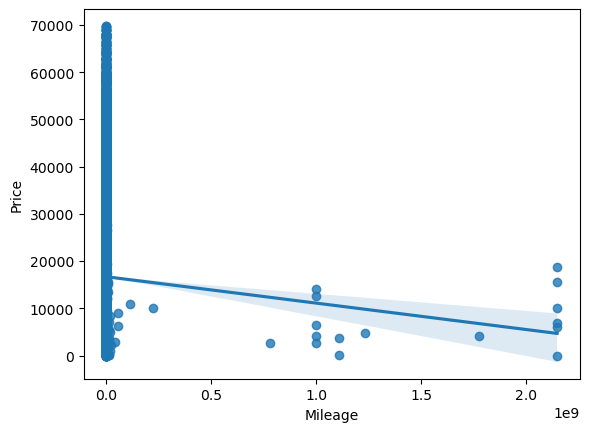

In [628]:
sns.regplot(x=df['Mileage'],y=df['Price'])

In [629]:
df['Mileage'].value_counts().sort_values(ascending=False).head()

Mileage
0         589
200000    178
150000    153
160000    118
180000    112
Name: count, dtype: int64

In [630]:
df.drop(columns='Mileage',inplace=True)  #Droping Mileage

## **Cropping Price**

<Axes: xlabel='Price', ylabel='Count'>

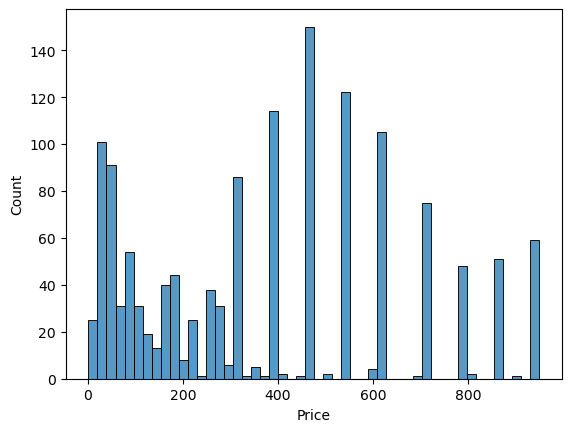

In [632]:
sns.histplot(df[df['Price']<1000]['Price'],bins=50)

In [633]:
df = df[df['Price']>1000]

## **Fixing Levy**

<Axes: xlabel='Levy', ylabel='Density'>

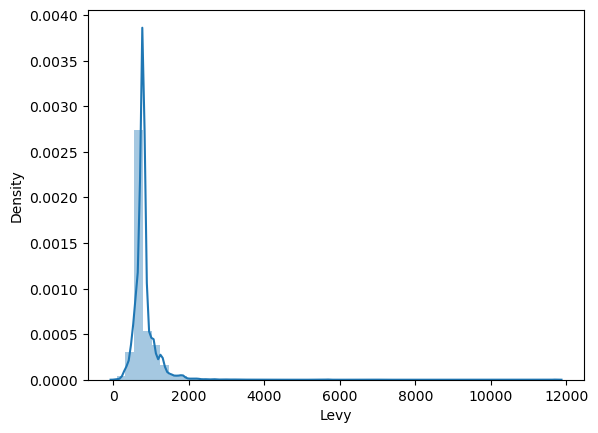

In [635]:
sns.distplot(df['Levy'])

In [636]:
de = df.copy()
de['Levy'] = de['Levy']/1000
levymax = (de['Levy'].median()+ 3*de['Levy'].std())*1000
levy=[]
for l in df['Levy']:
    if l>levymax:
        levy.append(levymax)
    else:
        levy.append(l)
df.drop(columns='Levy',inplace=True)
df['Levy'] = levy

<Axes: xlabel='Levy', ylabel='Density'>

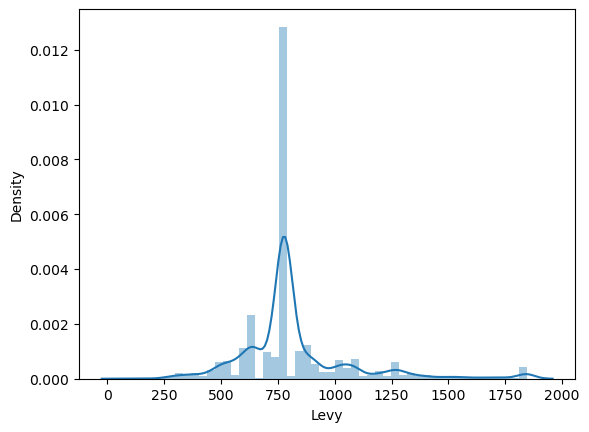

In [637]:
sns.distplot(df['Levy'])

In [638]:
df.head()


,Price,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Turbo,New_Car,Levy
ID,,,,,,,,,,,,,,,,,,
45654403,13328,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.500000,6.0,Automatic,4x4,04-May,Left wheel,Silver,12,0,0,1399.0
44731507,16621,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3.000000,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8,0,0,1018.0
45774419,8467,HONDA,FIT,2006,Hatchback,No,Petrol,1.299805,4.0,Variator,Front,04-May,Right-hand drive,Black,2,0,0,779.0
45769185,3607,FORD,Escape,2011,Jeep,Yes,Hybrid,2.500000,4.0,Automatic,4x4,04-May,Left wheel,White,0,0,0,862.0
45809263,11726,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.299805,4.0,Automatic,Front,04-May,Left wheel,Silver,4,0,0,446.0


In [639]:
categ_variables = ["Model", "Color", "Manufacturer", "Category", "Fuel type", "Gear box type", "Drive wheels", "Doors", "Wheel"]
one_hot_categ = ["Category", "Fuel type", "Gear box type", "Drive wheels", "Doors", "Wheel","Leather interior"]
target_categ = ["Model","Color","Manufacturer"]

## **Target encoding**

In [641]:
def Target_Encoding(df1,cols):
    tar_dict={}
    for col in cols:
        a = df1.groupby(col)["Price"].median().reset_index()
        df1 = df1.merge(a,on=col,how='left')
        df1.drop(columns=col,inplace=True)
        df1.rename(columns={'Price_x':'Price','Price_y':'encoded_'+col},inplace=True)
        tar_dict[col]=a
    return df1, tar_dict

In [642]:
df, tar_enc_dict = Target_Encoding(df,target_categ)

## **One Hot Encoding**

In [644]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse_output=False, drop='if_binary', handle_unknown='ignore', dtype='int32')
transformed_data = ohe.fit_transform(df[one_hot_categ])
o = pd.DataFrame(data=transformed_data, index=df.index, columns=ohe.get_feature_names_out())
df = pd.concat((df, o), axis=1)
df.drop(columns=one_hot_categ, inplace=True)
df.head()

,Price,Prod. year,Engine volume,Cylinders,Airbags,Turbo,New_Car,Levy,encoded_Model,encoded_Color,encoded_Manufacturer,Category_Cabriolet,Category_Coupe,Category_Goods wagon,Category_Hatchback,Category_Jeep,Category_Limousine,Category_Microbus,Category_Minivan,Category_Pickup,Category_Sedan,Category_Universal,Fuel type_CNG,Fuel type_Diesel,Fuel type_Hybrid,Fuel type_LPG,Fuel type_Petrol,Fuel type_Plug-in Hybrid,Gear box type_Automatic,Gear box type_Manual,Gear box type_Tiptronic,Gear box type_Variator,Drive wheels_4x4,Drive wheels_Front,Drive wheels_Rear,Doors_02-Mar,Doors_04-May,Doors_>5,Wheel_Right-hand drive,Leather interior_Yes
0,13328,2010,3.500000,6.0,12,0,0,1399.0,14504.5,13799.0,23521.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1
1,16621,2011,3.000000,6.0,8,0,0,1018.0,3293.0,16935.0,14740.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0
2,8467,2006,1.299805,4.0,2,0,0,779.0,11290.0,16935.0,11917.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,1,0
3,3607,2011,2.500000,4.0,0,0,0,862.0,16072.5,17249.0,14426.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1
4,11726,2014,1.299805,4.0,4,0,0,446.0,11290.0,13799.0,11917.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,1


## **Feature Importance**

In [646]:
from sklearn.ensemble import ExtraTreesRegressor
etr = ExtraTreesRegressor()
X = df.drop(columns='Price')
y = df['Price']
etr.fit(X, y)

ExtraTreesRegressor()

<Axes: xlabel='None'>

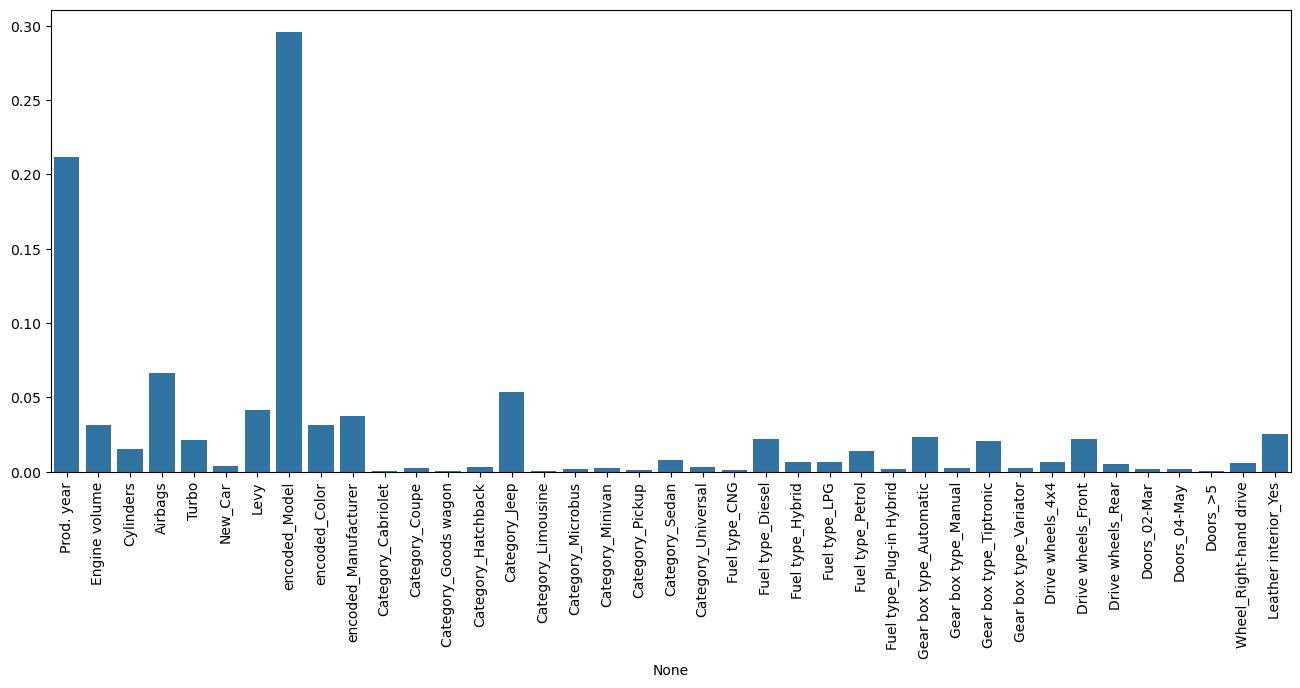

In [647]:
plt.figure(figsize=(16,6))
plt.xticks(rotation=90)
sns.barplot(x=X.columns,y=etr.feature_importances_)

In [648]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso, BayesianRidge
from sklearn.metrics import mean_squared_log_error, r2_score
from xgboost import XGBRegressor, XGBRFRegressor

In [649]:
lasso = Lasso()
rf = RandomForestRegressor()
xgb = XGBRegressor()
xgbrf = XGBRFRegressor()

In [650]:
X = df.drop(columns='Price')
Y = np.array(df['Price'])
Y = Y.reshape((-1,1))

In [651]:
# StandardScaler +RF

ss1 = StandardScaler()
ss2 = StandardScaler()
x = ss1.fit_transform(X)
y = ss2.fit_transform(Y)

xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.25,random_state=42)

rf.fit(xtrain,ytrain)
train_pred = np.array(rf.predict(xtrain))
train_pred = train_pred.reshape((-1,1))
ypred = np.array(rf.predict(xtest))
ypred = ypred.reshape((-1,1))

ytrain = ss2.inverse_transform(ytrain)
ytest = ss2.inverse_transform(ytest)
ypred = ss2.inverse_transform(ypred)
train_pred = ss2.inverse_transform(train_pred)

print("Train set error: ", np.sqrt(mean_squared_log_error(ytrain,train_pred)))
print("Test set error: ", np.sqrt(mean_squared_log_error(ytest,ypred)))
print("Train R2: ", r2_score(ytrain,train_pred))
print("Test R2: ", r2_score(ytest,ypred))


Train set error:  0.2630625284152238
Test set error:  0.43396732473051863
Train R2:  0.9425520793388102
Test R2:  0.80338329319621


## **Trying MinMax Scaler**

In [653]:
# MinMaxScaler + RF

mms1 = MinMaxScaler()
mms2 = MinMaxScaler()
x = mms1.fit_transform(X)
y = mms2.fit_transform(Y)

xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.25,random_state=42)

rf.fit(xtrain,ytrain)
train_pred = np.array(rf.predict(xtrain))
train_pred = train_pred.reshape((-1,1))
ypred = np.array(rf.predict(xtest))
ypred = ypred.reshape((-1,1))

ytrain = mms2.inverse_transform(ytrain)
ytest = mms2.inverse_transform(ytest)
ypred = mms2.inverse_transform(ypred)
train_pred = mms2.inverse_transform(train_pred)

print("Train set error: ", np.sqrt(mean_squared_log_error(ytrain,train_pred)))
print("Test set error: ", np.sqrt(mean_squared_log_error(ytest,ypred)))
print("Train R2: ", r2_score(ytrain,train_pred))
print("Test R2: ", r2_score(ytest,ypred))

Train set error:  0.2624906926954603
Test set error:  0.436307039130243
Train R2:  0.9432820970202843
Test R2:  0.8026919186906771


## **Trying Robust Scaler**

In [655]:
#Robust Scaler + RF

rs1 = RobustScaler()
rs2 = RobustScaler()
x = rs1.fit_transform(X)
y = rs2.fit_transform(Y)

xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.25,random_state=42)

rf.fit(xtrain,ytrain)
train_pred = np.array(rf.predict(xtrain))
train_pred = train_pred.reshape((-1,1))
ypred = np.array(rf.predict(xtest))
ypred = ypred.reshape((-1,1))

ytrain = rs2.inverse_transform(ytrain)
ytest = rs2.inverse_transform(ytest)
ypred = rs2.inverse_transform(ypred)
train_pred = rs2.inverse_transform(train_pred)

print("Train set error: ", np.sqrt(mean_squared_log_error(ytrain,train_pred)))
print("Test set error: ", np.sqrt(mean_squared_log_error(ytest,ypred)))
print("Train R2: ", r2_score(ytrain,train_pred))
print("Test R2: ", r2_score(ytest,ypred))

Train set error:  0.2627278881533525
Test set error:  0.435355278649465
Train R2:  0.9424611978357067
Test R2:  0.802769871326156


In [656]:
#StandardScaler + XGBRF
ss1 = StandardScaler()
ss2 = StandardScaler()
x = ss1.fit_transform(X)
y = ss2.fit_transform(Y)

xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.25,random_state=42)

xgbrf.fit(xtrain,ytrain)
train_pred = np.array(xgbrf.predict(xtrain))
train_pred = train_pred.reshape((-1,1))
ypred = np.array(xgbrf.predict(xtest))
ypred = ypred.reshape((-1,1))

ytrain = ss2.inverse_transform(ytrain)
ytest = ss2.inverse_transform(ytest)
ypred = ss2.inverse_transform(ypred)
train_pred = ss2.inverse_transform(train_pred)

print("Train set error: ", np.sqrt(mean_squared_log_error(ytrain,train_pred)))
print("Test set error: ", np.sqrt(mean_squared_log_error(ytest,ypred)))
print("Train R2: ", r2_score(ytrain,train_pred))
print("Test R2: ", r2_score(ytest,ypred))


Train set error:  0.5624278144171188
Test set error:  0.572222862061772
Train R2:  0.67473365099442
Test R2:  0.6742485023571305


### Random Forest with Standard Scaler is giving the best results

## **Hyperparameter Tuning**

In [659]:
n_est = [x for x in range(100,1200,100)]
max_feat = ['sqrt']
min_sample_split=[2,5,10,20,50]
min_sample_leaf=[1,2,5,10,20]
max_depth = [x for x in range(5,20,2)]

In [660]:
random_grid = {'n_estimators': n_est,
                'max_depth': max_depth,
                'max_features': max_feat,
                'min_samples_split': min_sample_split,
                'min_samples_leaf': min_sample_leaf}

In [661]:
model = RandomizedSearchCV(rf,param_distributions=random_grid,n_iter=150,scoring='neg_mean_squared_log_error',verbose=2,cv=5)

In [662]:
model.fit(xtrain,ytrain)

Fitting 5 folds for each of 150 candidates, totalling 750 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=1100; total time=   2.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=1100; total time=   2.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=1100; total time=   2.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=1100; total time=   2.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=1100; total time=   2.0s
[CV] END max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   2.5s
[CV] END max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   2.5s
[CV] END max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estim

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=150,
                   param_distributions={'max_depth': [5, 7, 9, 11, 13, 15, 17,
                                                      19],
                                        'max_features': ['sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10, 20],
                                        'min_samples_split': [2, 5, 10, 20, 50],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100]},
                   scoring='neg_mean_squared_log_error', verbose=2)

In [663]:
model.best_params_

{'n_estimators': 1100,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 19}

In [664]:
f_model = RandomForestRegressor(n_estimators= 700,min_samples_split= 2,min_samples_leaf= 1,
                                max_features= 'sqrt',max_depth= 19)
f_model.fit(xtrain,ytrain)

RandomForestRegressor(max_depth=19, max_features='sqrt', n_estimators=700)

## **Preparing Test Set**

In [866]:
test = pd.read_csv('test.csv')
test.head()

,ID,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Price
0,44020629,-,VOLKSWAGEN,Golf,2012,Hatchback,No,Diesel,2.0 Turbo,0 km,4,Manual,Front,02-Mar,Left wheel,Grey,10,NaN
1,45784798,-,HYUNDAI,Sonata,2012,Sedan,Yes,Petrol,2.4,26000 km,4,Tiptronic,Front,04-May,Left wheel,Grey,10,NaN
2,45800257,-,NISSAN,Tiida,2005,Sedan,No,Petrol,1.5,168000 km,4,Automatic,Front,04-May,Right-hand drive,Sky blue,8,NaN
3,45797981,975,VOLVO,XC90,2012,Jeep,Yes,Petrol,3.2,143000 km,6,Automatic,4x4,04-May,Left wheel,Blue,12,NaN
4,45814303,-,OPEL,Astra,1993,Hatchback,No,Petrol,1.6,200000 km,4,Manual,Front,04-May,Left wheel,Black,0,NaN


In [868]:
def Engvol(df):
    df['Engine volume'] = df['Engine volume'].astype(str)
    Turbo = []
    for index in df.index:
        engine_volume = df.at[index, 'Engine volume']
        if len(engine_volume) > 4:
            Turbo.append(1)
            df.at[index, 'Engine volume'] = engine_volume[:3]
        else:
            Turbo.append(0)
    df['Turbo'] = Turbo
Engvol(test)
test.index = test['ID']
test.drop(columns=['ID', 'Price'], inplace=True)

test['Levy'] = test['Levy'].replace('-', np.nan).astype('float16')

Levy_median = test['Levy'].median()
test['Levy'].fillna(Levy_median, inplace=True)

test['Mileage'] = test['Mileage'].str[:-3].astype('int64')

test['New_Car'] = test['Mileage'].apply(lambda mil: 1 if mil == 0 else 0)
test.drop(columns='Mileage', inplace=True)

levymax = test['Levy'].max()
test['Levy'] = test['Levy'].apply(lambda l: levymax if l > levymax else l)


In [870]:
for col in target_categ:
    test = test.merge(tar_enc_dict[col],how='left',on=col)
    test.drop(columns=col,inplace=True)
    test.rename(columns={'Price':'encoded_'+col},inplace=True)
test.head()

,Levy,Prod. year,Category,Leather interior,Fuel type,Engine volume,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Airbags,Turbo,New_Car,encoded_Model,encoded_Color,encoded_Manufacturer
0,784.0,2012,Hatchback,No,Diesel,2.0,4,Manual,Front,02-Mar,Left wheel,10,1,1,4704.0,18189.0,12544.0
1,784.0,2012,Sedan,Yes,Petrol,2.4,4,Tiptronic,Front,04-May,Left wheel,10,0,0,13842.5,18189.0,19130.0
2,784.0,2005,Sedan,No,Petrol,1.5,4,Automatic,Front,04-May,Right-hand drive,8,0,0,8467.0,13956.0,9095.0
3,975.0,2012,Jeep,Yes,Petrol,3.2,6,Automatic,4x4,04-May,Left wheel,12,0,0,15056.0,11917.0,9100.0
4,784.0,1993,Hatchback,No,Petrol,1.6,4,Manual,Front,04-May,Left wheel,0,0,0,6586.0,16935.0,6586.0


In [872]:
te = pd.DataFrame(data=ohe.transform(test[one_hot_categ]), index=test.index, columns=ohe.get_feature_names_out())
test = pd.concat((test, te), axis=1)
test.drop(columns=one_hot_categ, inplace=True)
test.head()

,Levy,Prod. year,Engine volume,Cylinders,Airbags,Turbo,New_Car,encoded_Model,encoded_Color,encoded_Manufacturer,Category_Cabriolet,Category_Coupe,Category_Goods wagon,Category_Hatchback,Category_Jeep,Category_Limousine,Category_Microbus,Category_Minivan,Category_Pickup,Category_Sedan,Category_Universal,Fuel type_CNG,Fuel type_Diesel,Fuel type_Hybrid,Fuel type_LPG,Fuel type_Petrol,Fuel type_Plug-in Hybrid,Gear box type_Automatic,Gear box type_Manual,Gear box type_Tiptronic,Gear box type_Variator,Drive wheels_4x4,Drive wheels_Front,Drive wheels_Rear,Doors_02-Mar,Doors_04-May,Doors_>5,Wheel_Right-hand drive,Leather interior_Yes
0,784.0,2012,2.0,4,10,1,1,4704.0,18189.0,12544.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0
1,784.0,2012,2.4,4,10,0,0,13842.5,18189.0,19130.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1
2,784.0,2005,1.5,4,8,0,0,8467.0,13956.0,9095.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,1,0
3,975.0,2012,3.2,6,12,0,0,15056.0,11917.0,9100.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1
4,784.0,1993,1.6,4,0,0,0,6586.0,16935.0,6586.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0


In [862]:
test.isna().sum()

Levy                          0
Prod. year                    0
Engine volume                 0
Cylinders                     0
Airbags                       0
Turbo                         0
New_Car                       0
encoded_Model               455
encoded_Color                 0
encoded_Manufacturer          6
Category_Cabriolet            0
Category_Coupe                0
Category_Goods wagon          0
Category_Hatchback            0
Category_Jeep                 0
Category_Limousine            0
Category_Microbus             0
Category_Minivan              0
Category_Pickup               0
Category_Sedan                0
Category_Universal            0
Fuel type_CNG                 0
Fuel type_Diesel              0
Fuel type_Hybrid              0
Fuel type_LPG                 0
Fuel type_Petrol              0
Fuel type_Plug-in Hybrid      0
Gear box type_Automatic       0
Gear box type_Manual          0
Gear box type_Tiptronic       0
Gear box type_Variator        0
Drive wh

In [874]:
model_med = tar_enc_dict['Model']['Price'].median()
manu_med = tar_enc_dict['Manufacturer']['Price'].median()
test['encoded_Model'] = test['encoded_Model'].fillna(model_med)
test['encoded_Manufacturer'] = test['encoded_Manufacturer'].fillna(manu_med)

In [876]:
test.head()

,Levy,Prod. year,Engine volume,Cylinders,Airbags,Turbo,New_Car,encoded_Model,encoded_Color,encoded_Manufacturer,Category_Cabriolet,Category_Coupe,Category_Goods wagon,Category_Hatchback,Category_Jeep,Category_Limousine,Category_Microbus,Category_Minivan,Category_Pickup,Category_Sedan,Category_Universal,Fuel type_CNG,Fuel type_Diesel,Fuel type_Hybrid,Fuel type_LPG,Fuel type_Petrol,Fuel type_Plug-in Hybrid,Gear box type_Automatic,Gear box type_Manual,Gear box type_Tiptronic,Gear box type_Variator,Drive wheels_4x4,Drive wheels_Front,Drive wheels_Rear,Doors_02-Mar,Doors_04-May,Doors_>5,Wheel_Right-hand drive,Leather interior_Yes
0,784.0,2012,2.0,4,10,1,1,4704.0,18189.0,12544.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0
1,784.0,2012,2.4,4,10,0,0,13842.5,18189.0,19130.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1
2,784.0,2005,1.5,4,8,0,0,8467.0,13956.0,9095.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,1,0
3,975.0,2012,3.2,6,12,0,0,15056.0,11917.0,9100.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1
4,784.0,1993,1.6,4,0,0,0,6586.0,16935.0,6586.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0


In [889]:
training_columns = ss1.feature_names_in_
test = test[training_columns]

In [891]:
x_test = ss1.transform(test)
y_test = f_model.predict(x_test)

In [893]:
y_test = y_test.reshape((-1,1))
y_test = pd.DataFrame(y_test)
y_test.head()

,0
0,14567.224724
1,17702.916393
2,8120.163479
3,12294.619252
4,4900.941463


In [895]:
y_test.to_csv("submission1.csv",header='Price',index=False)